# Hong Kong Rainstorm Record Analysis




# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

#Reading dataset

In [3]:
dataset=pd.read_csv('rainstorm.csv')

#Exploratory Data Analysis on our dataset

In [13]:
dataset.shape

(721, 6)

In [4]:
dataset.count()

color         721
start time    721
start date    721
end time      721
end date      721
duration      721
dtype: int64

In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   color       721 non-null    object
 1   start time  721 non-null    object
 2   start date  721 non-null    object
 3   end time    721 non-null    object
 4   end date    721 non-null    object
 5   duration    721 non-null    object
dtypes: object(6)
memory usage: 33.9+ KB


In [5]:
dataset.describe()

,color,start time,start date,end time,end date,duration
count,721,721,721,721,721,721
unique,3,269,459,244,461,112
top,Amber,11:30,9-Jun-06,11:30,9-Jun-06,01 00
freq,579,8,7,12,7,40


In [6]:
dataset.columns

Index(['color', 'start time', 'start date', 'end time', 'end date',
       'duration'],
      dtype='object')

In [7]:
dataset.nunique(dropna = True)

color           3
start time    269
start date    459
end time      244
end date      461
duration      112
dtype: int64

#Plotting




**Pie Chart that shows Distribution of Warning Signs**



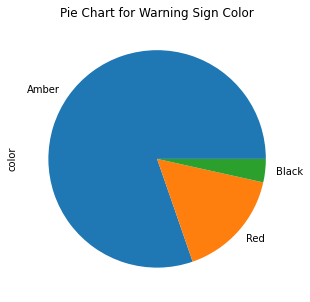

In [8]:
plt.figure(figsize=(5, 5))
top = dataset['color'].value_counts().sort_values(ascending=False).head(10)
top.plot(kind='pie')
plt.title('Pie Chart for Warning Sign Color')
plt.show()     

As Amber signal dominates, we conclude that a rainfall of less than 30mm/hr occurs most of the time.

**Distribution of Rainfall throughout the months**

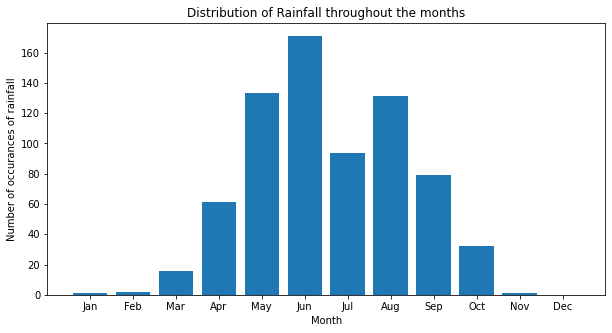

In [15]:
m_count=[]
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
for m in months:
 t=0 
 for d in dataset['start date']:
  t+=d.count(m)
 m_count.append(t)

#displaying the plot
fig = plt.figure(figsize = (10, 5))
plt.bar(months,m_count)
plt.xlabel("Month")
plt.ylabel("Number of occurances of rainfall")
plt.title('Distribution of Rainfall throughout the months')
plt.show()

We observe that the maximum rainfall occurs in June. We can classify the period from May-August as Monsoon.

**Distribution of duration of rainfall**

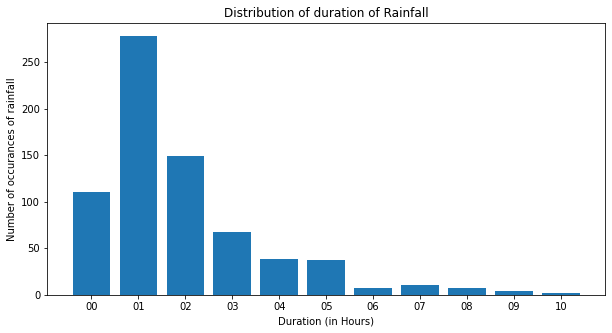

In [22]:
duration_range=['00','01','02','03','04','05','06','07','08','09','10']
dur_range_no=[]
for dur in duration_range:
  t=0
  for d in dataset['duration']:
    if d.startswith(dur):
      t+=1
  dur_range_no.append(t)

#displaying the plot
fig = plt.figure(figsize = (10, 5))
plt.bar(duration_range, dur_range_no)
plt.xlabel("Duration (in Hours)")
plt.ylabel("Number of occurances of rainfall")
plt.title('Distribution of duration of Rainfall')
plt.show()

On an average rainfall lasted 1-2 hours each occurance.

**Total duration of rainfall with the years**

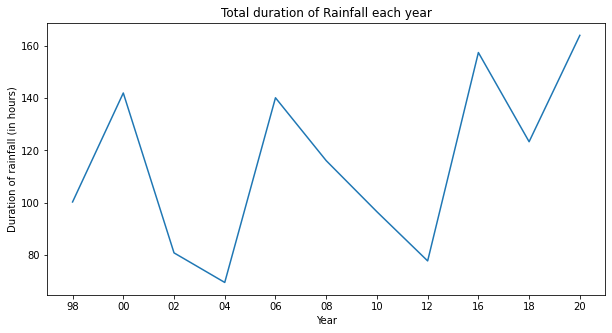

In [15]:
years=['98','00','02','04','06','08','10','12','16','18','20']
y_duration_array=[]
for y in years:
  y_duration=0
  counter=0
  for d in dataset['start date']:
    duration=[]
    if (d.endswith(y)):
      duration=(dataset['duration'][counter]).split()
      y_duration+=int(duration[0])+int(duration[1])/60.0
      counter+=1
  y_duration_array.append(y_duration)

#displaying the plot
fig = plt.figure(figsize = (10, 5)) 
plt.plot(years,y_duration_array)
plt.xlabel("Year")
plt.ylabel("Duration of rainfall (in hours)")
plt.title('Total duration of Rainfall each year')
plt.show()

While the total duration of rainfall keeps oscillating through the years, there seems to be a net positive increase in rainfall after the year 2012.

**Expectation of rainfall in future years**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


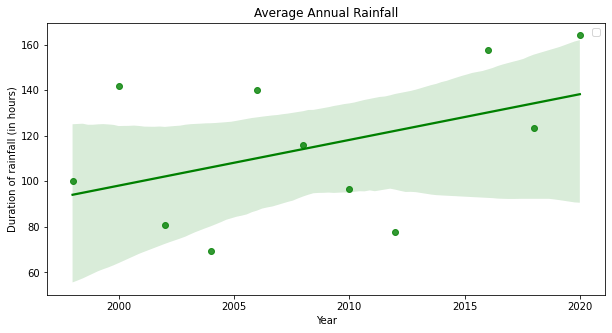

In [32]:
years=[1998,2000,2002,2004,2006,2008,2010,2012,2016,2018,2020]

#displaying the plot
fig = plt.figure(figsize = (10, 5))
plt.xlabel("Year")
plt.ylabel("Duration of rainfall (in hours)")
plt.title('Average Annual Rainfall')
sb.regplot(years,y_duration_array , color='green')

# Conclusions



*   As Amber signal dominates, we conclude that a rainfall of less than 30mm/hr occurs most of the time.
*  We observe that the maximum rainfall occurs in June. We can classify the period from May-August as Monsoon.

*   On an average rainfall lasted 1-2 hours each occurance.

*   There is a net positive increase in total duration of rainfall after the year 2012.





